In [1]:
from flask import Flask, jsonify, request
from flask_cors import CORS, cross_origin
import pandas as pd
import numpy as np

import report_exec_time_model as report_model

import subprocess
from apscheduler.schedulers.background import BackgroundScheduler
import atexit

2.0.0


In [2]:
# create scheduler
scheduler = BackgroundScheduler()
scheduler.start()

# Using UTC time to schedule job, once per day.
scheduler.add_job(
    func=report_model.train_model,
    trigger='cron',
    hour='9', 
    minute='45')

# Shut down the scheduler when exiting the process
atexit.register(lambda: scheduler.shutdown())

<function __main__.<lambda>()>

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
  'report_id'         : [1]
  'day_part'          : [3]
  'report_params'     : [2.70811687]


W0429 09:43:19.891729 139849653266176 base_layer.py:1814] Layer sequential is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  'report_id'         : [1]
  'day_part'          : [3]
  'report_params'     : [2.70811687]


W0429 09:43:25.107447 139849653266176 util.py:144] Unresolved object in checkpoint: (root).layer-0._resources.0._initializer
W0429 09:43:25.108857 139849653266176 util.py:144] Unresolved object in checkpoint: (root).layer-0._resources.1._initializer
W0429 09:43:25.110162 139849653266176 util.py:144] Unresolved object in checkpoint: (root).layer-0._resources.2._initializer
W0429 09:43:25.110954 139849653266176 util.py:144] Unresolved object in checkpoint: (root).layer-0._resources.3._initializer
W0429 09:43:25.111974 139849653266176 util.py:144] Unresolved object in checkpoint: (root).layer-0._resources.4._initializer
W0429 09:43:25.115690 139849653266176 util.py:144] Unresolved object in checkpoint: (root).layer-0._resources.5._initializer
W0429 09:43:25.116758 139849653266176 util.py:144] Unresolved object in checkpoint: (root).layer-0._resources.6._initializer
W0429 09:43:25.118804 139849653266176 util.py:144] Unresolved object in checkpoint: (root).layer-0._resources.7._initializer


Time, mean for test dataset: 463.66
4800 train examples
1200 validation examples
500 test examples
Model training: 1
Testing set RMSE Error:11.03
Saving model with RMSE Error:11.03


W0429 09:46:15.474068 139849653266176 util.py:144] Unresolved object in checkpoint: (root).layer-0._resources.0._initializer
W0429 09:46:15.478718 139849653266176 util.py:144] Unresolved object in checkpoint: (root).layer-0._resources.1._initializer
W0429 09:46:15.480010 139849653266176 util.py:144] Unresolved object in checkpoint: (root).layer-0._resources.2._initializer
W0429 09:46:15.482679 139849653266176 util.py:144] Unresolved object in checkpoint: (root).layer-0._resources.3._initializer
W0429 09:46:15.485660 139849653266176 util.py:144] Unresolved object in checkpoint: (root).layer-0._resources.4._initializer
W0429 09:46:15.486567 139849653266176 util.py:144] Unresolved object in checkpoint: (root).layer-0._resources.5._initializer
W0429 09:46:15.489037 139849653266176 util.py:144] Unresolved object in checkpoint: (root).layer-0._resources.6._initializer
W0429 09:46:15.491773 139849653266176 util.py:144] Unresolved object in checkpoint: (root).layer-0._resources.7._initializer


Model training: 2
Testing set RMSE Error:18.83
Model training: 3
Testing set RMSE Error:18.70
Model training: 4
Testing set RMSE Error: 8.95
Saving model with RMSE Error: 8.95
Model training: 5
Testing set RMSE Error:18.66
Model training: 6
Testing set RMSE Error:18.73
Model training: 7
Testing set RMSE Error: 8.02
Saving model with RMSE Error: 8.02
Model training: 8
Testing set RMSE Error:11.59
Model training: 9
Testing set RMSE Error:18.66
Model training: 10
Testing set RMSE Error:18.71


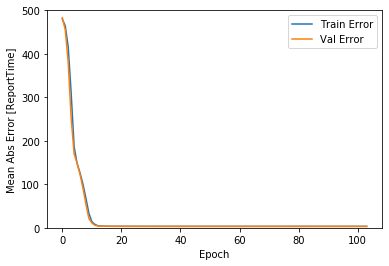

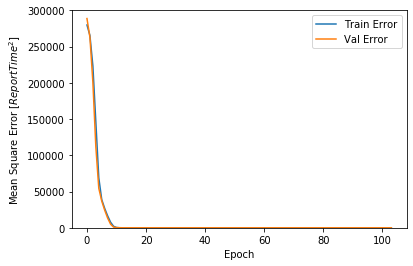

Best RMSE Error: 8.02
Creating new model: 1588154196
  'report_id'         : [1]
  'day_part'          : [3]
  'report_params'     : [2.70811687]
  'report_id'         : [1]
  'day_part'          : [3]
  'report_params'     : [2.70811687]


W0429 11:15:12.675378 139847004051200 util.py:144] Unresolved object in checkpoint: (root).layer-0._resources.0._initializer
W0429 11:15:12.676504 139847004051200 util.py:144] Unresolved object in checkpoint: (root).layer-0._resources.1._initializer
W0429 11:15:12.677766 139847004051200 util.py:144] Unresolved object in checkpoint: (root).layer-0._resources.2._initializer
W0429 11:15:12.678560 139847004051200 util.py:144] Unresolved object in checkpoint: (root).layer-0._resources.3._initializer
W0429 11:15:12.680583 139847004051200 util.py:144] Unresolved object in checkpoint: (root).layer-0._resources.4._initializer
W0429 11:15:12.682158 139847004051200 util.py:144] Unresolved object in checkpoint: (root).layer-0._resources.5._initializer
W0429 11:15:12.683646 139847004051200 util.py:144] Unresolved object in checkpoint: (root).layer-0._resources.6._initializer
W0429 11:15:12.685354 139847004051200 util.py:144] Unresolved object in checkpoint: (root).layer-0._resources.7._initializer


In [3]:
app = Flask(__name__)
CORS(app)

@app.route("/katana-ml/api/v1.0/predict/reporttime", methods=['POST'])
def predict():
    report_id = request.json['report_id']
    report_params = request.json['report_params']
    day_part = request.json['day_part']
    
    input_data = [[report_id, report_params, day_part]]
    result = report_model.run_predict(input_data)
    
    return str(result[0][0])

# running REST interface port=3000
if __name__ == "__main__":
    app.run(debug=False, host='0.0.0.0', port=3000)